# Investigation of IPR in the Floquet Dynamics of Many Body Systems

We're trying to look at localization/freezing in rapidly driven time-periodic systems. Specifically, we want to check whether freezing exists in long raange spin systems in the manner seen for short range systems. We start by defining the *Inverse Participation Ratio* (IPR) for a wavefunction $\psi(x)$ as 
\begin{equation*}
\phi_{IPR}\equiv \int dx\;\vert\psi(x)\vert^4
\end{equation*}

More generally, the IPR of a state $|\phi\rangle$ in a representation given by complete orthonormal basis $|m\rangle$ is $\phi_{IPR} = \sum_m\vert\langle m \vert\phi\rangle\vert^4$.

In the context of localization, the IPR is useful. The smallest value of the IPR corresponds to a fully delocalized state, $\psi(x)=1/\sqrt{N}$ for a system of size $N$, where the IPR yields $\sum_x |\psi(x)|^4=N/(N^{1/2})^4=1/N$. Values of the IPR close to 1 correspond to localized states. For a periodically driven system, we look at the IPR of the Floquet modes at $t=T$, where $t=2\pi/\omega$ for drive frequency $\omega$.

## Transverse-Field Ising model.
First, consider the well-known Hamiltonian of the driven Transverse Field Ising model of $N$ spins:
\begin{align*}
 H(t) &= H_0 + \left(h_0 + h\cos{\omega t}\right) H_1\\
H_0 &= -\frac{1}{2}\sum_{i} \sigma^x_i \sigma^x_{i+1}\\
H_1 &= -\frac{1}{2}\sum_n^N \sigma^z_{n}
\end{align*}

The TFIM model can be readily transformed into a Bogoliubov-type fermionic system via the Jordan-Wigner transformation. This yields an effective Hamiltonian

\begin{equation*}
\mathcal{H}(t)=\sum_{{k}} \psi_{{k}}^{\dagger}\left(\begin{array}{cc}
h_{z}(t)+f_{{k}} & \Delta_{{k}} \\
\Delta_{{k}}^{*} & -h_{z}(t)-f_{{k}}
\end{array}\right) \psi_{{k}},
\end{equation*}

where $h_z(t) = h_0 + h\cos{\omega t}$, $\psi_k = (c_{-k}, c^\dagger_k)^T$, with $f_k = J\cos{k}$, $\Delta_k = J\sin{k}$.Now, for large $\omega \gg f_k$, the RWA approximation yields an effective Hamiltonian [1]

\begin{equation*}
H_{RWA}(t)=-\sum_{{k}}\Delta_k \phi_{k}^{\dagger}\left(\begin{array}{cc}
0 & i  J_0(2h/\omega)e^{-2itf_k} \\
-i J_0(2h/\omega)e^{2itf_k} & 0
\end{array}\right)\phi_{k}
\end{equation*}
Note that, for a particular $k$, the driven TLS, in the RWA, is $H_k^{rwa} = 2J_0(2h/\omega)\Delta_k\;\left[\sigma_x\cos{\left(2f_kt\right)} - \sigma_y\sin{\left(2f_kt\right)}\right]$

For the exact dynamics, a particular Floquet mode can be written as $|\phi\rangle = \prod_{k>0}|\phi^n_k\rangle$. We plot the reduced IPR, defined for the two values of $|\phi^n_k\rangle\; \forall k$ to be
\begin{equation*}
\phi^{(n)}_{IPR}(k) = \left\vert \langle 0 |\phi^n_k\rangle  \right\vert^4 + \left\vert \langle +k, -k |\phi^n_k\rangle  \right\vert^4,
\end{equation*}
where $n=0,1$. The code cell below plots $\phi^n_{PR}(k)$.



## References:

[1] Das, A. arXiv:0904.2172 (2009)

In [ ]:
import numpy as np
from qutip import tensor, sigmax, sigmay, sigmaz, qeye, mesolve 
from qutip.floquet import floquet_modes
from scipy.special import j0

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.cos(w * t)

def get_floquet_isingfermion(k, args, **kwargs):
    
    sx = sigmax()
    sz = sigmaz()
    
    # construct the hamiltonian
    H0 = np.sin(k) * sx + np.cos(k) * sz
    H1 = sz
    
    H = [H0,[H1,drive]]    
    T = 2 * np.pi/args['omega']

    return floquet_modes(H, T, args, **kwargs)

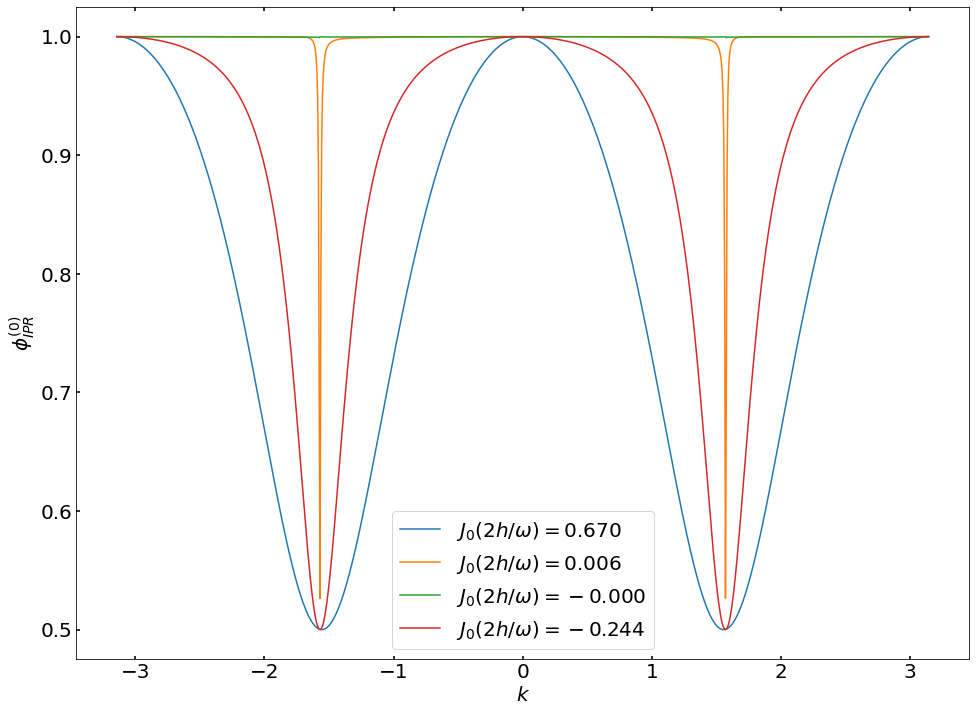

CPU times: user 34.6 s, sys: 115 ms, total: 34.8 s
Wall time: 34.8 s


In [59]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros
from tqdm import tqdm
import traceback

plt.rcParams.update({
    "figure.figsize": (16, 12),
    "text.usetex": False,
    "font.size": 20})

freezing_pts = jn_zeros(0, 5)
max_pts = jn_zeros(1,5)

#
# set up the calculation
#
omega = 90.0
w = omega
hfrz = omega * freezing_pts/2
hmed = 0.995 * omega * freezing_pts/2
hmax = 1.25 * omega * max_pts/2
hfin = 0.5 * omega * freezing_pts/2

def get_iprvals_exact(k, params, **kwargs):
    f_states, f_energies = get_floquet_isingfermion(k, params, **kwargs)
    floquet_matrix = np.array(f_states)[:,:,0]
    return np.sum(np.abs(floquet_matrix)**4, axis=-1)

delta = 1e-4
fbz = np.linspace(-np.pi+delta, np.pi-delta, 1000)

for h in np.sort([hfrz[0], hmed[0], hmax[0], hfin[0]]):
    params = {'h0':0.0, 'h':h, 'omega':omega}
    iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
    plt.plot(fbz, iprvals_exact[:,0], label=fr"$J_0(2h/\omega)={j0(2*h/w):1.3f}$")

plt.ylabel(f'$\phi^{{({{0}})}}_{{IPR}}$')
plt.xlabel(r'$k$')
plt.legend()

plt.show()

The plots above are for the **exact** dynamics of the TFIM in Fermionic representation, with the reduced IPR plotted for the entire Brillouin zone for a few drive amplitudes. The frequency is set to $\omega = 90$ and the IPR of one of the two Floquet modes are plotted at time $t=T$ for $4$ chosen amplitudes. As can be seen, the exact result is consistent with the RWA approximation. When $J_0(2h/\omega) = 0$, the RWA Hamiltonian vanishes, yielding an IPR of unity. At other points, the IPR is unity only when $k=\pm \pi$ (since $\Delta_k=0$) and $k=0$ (since $f_k = 0$ and the Hamiltonian for each $k$ $\sim \sigma_x$); other than that, there is "delocalization" due to the ensuing dynamics.

## The Long-Range case: LMG model

Consider the Hamiltonian of the type
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \left(h \cos{(\omega t)} + h_0\right)\; \hat{H}_1,
\end{equation}

where

\begin{eqnarray}
\hat{H}_0 &=& \sum_{ij}J_{ij}\hat{\sigma}^z_i\hat{\sigma}^z_j,\\
\hat{H}_1 &=& \sum_i\hat{\sigma}^x_i.
\end{eqnarray}
here,
\begin{eqnarray}
J_{ij} =\frac{J_\alpha}{N^{1-\alpha}}\sum_{(i<j)}^{N}\frac{1}{r_{ij}}=1,\\
\end{eqnarray}
a condition that is necessary in order to keep the energy per spin extensive (linear in $N$). Putting  $\alpha = 0$ yields the **Lipkin Meshkov Glick (LMG)** model with all-to-all interaction, yielding,
\begin{eqnarray}
J_{ij} =\frac{J_0}{N}C^N_2=\frac{J_0}{N}\frac{N(N-1)}{2}=1\\
J_0 = \frac{2}{N-1}=KacN,
\end{eqnarray}
where $KacN$ is the Kac-norm.

Here, we have $N$ spin-$1/2$ particles in a $1-$dimensional lattice, and $i,j$ are site indices. We will now attempt a numerical evaluation of
the Floquet eigenspectrum of this system.

First, define permutation operator $P_{ij} = \displaystyle\frac{1}{2}\left(1+ \vec{\sigma}_i\cdot\vec{\sigma}_j\right)$,
and note that $[P_{ij}, H]=0$. Thus, we can reduce the problem size from the full $2^N\times 2^N$ Hilbert space
to the subspace spanned by the degenerate eigenvectors of $P_{ij}$ corresponding to a single eigenvalue, say $1$.
This is isomorphic to the subspace spanned by degenerate eigenstates of the operator $S^2=|\vec{S}|^2$ with eigenvalue
$\displaystyle\frac{N}{2}\left(\frac{N}{2}+1\right)$, where

\begin{equation}
\vec{S}=S^x\hat{x}+S^y\hat{y}+S^z\hat{z}\equiv \sum_i \vec{\sigma}_i.
\end{equation}

Note that, since $[S^2, S^z]=0$, these are also eigenstates of $S^z$ in this so-called
TSS subspace. The corresponding eigenvalues are $Ns_n$, where $s_n=-\frac{1}{2}+\frac{n}{N}$ and the index
$n= 0 (1) N$ has $N+1$ values. Thus

\begin{equation}
S^z |s_n\rangle = Ns_n|s_n\rangle,
\end{equation}

and the matrix elements $(S^z)_{ij} = Ns_s\delta_{ij}$. Furthermore, defining ladder operators

\begin{equation}
S_\pm \equiv S^x \pm i S^y,
\end{equation}

and using the result

\begin{equation}
S_\pm |s_n\rangle = \sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n\pm 1}\right)}\;\;|s_{n\pm 1}\rangle,
\end{equation}

we can obtain the matrix elements $S^x = S_+ + S_-$ to be

\begin{equation*}
(S^x)_{nm} = \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n + 1}\right)}\;\;\delta_{n+1, m}  
                        +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n- 1}\right)}\;\;\delta_{n-1,m}\bigg]
\end{equation*}

Note that, considering $i<j$ the Hamiltonian can be readily written as
$H(t) = -\displaystyle\frac{2}{N-1}(S^z)^2 - (h \cos{(\omega t )} + h_0)S^x$, the matrix elements of
\begin{eqnarray}
\left(H_0\right)_{ij} &=& -\frac{2}{N-1} s^2_i \delta_{ij},\nonumber\\
\left(H_1\right)_{ij} &=& \bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i + 1}\right)}\;\;\delta_{i+1, j}  \\
    & &                     +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i- 1}\right)}\;\;\delta_{i-1,j}\bigg]
\end{eqnarray}

Note that, in the continuum limit, $N\rightarrow\infty$, we can ignore the difference between adjacent values
of $s_i$. Thus, the Hamiltonian per particle becomes $h(t)\equiv \displaystyle\frac{1}{N}H(t) = h + h_0\cos{(\omega t)}h_1$, where

\begin{eqnarray}
\left(h\right)_{ij} &\approx& - 2s^2_i \delta_{ij},\nonumber\\
H_0 &\rightarrow& -2s^2\\
\left(h_1\right)_{ij} &\approx& \sqrt{1 - 4s^2_i}\left[\delta_{i+1, j}  + \delta_{i-1,j}\right]\\
H_1 &\rightarrow& \sqrt{1 - 4s^2_i}\;\;\cos{p},
\end{eqnarray}
where we have expanded the matrix elements in a basis of $e^{ipx}$.


This Hamiltonian can be simplified in the Rotated Basis as follows. Transform the Hamiltonian to the frame given by the transformation

\begin{equation*}
\hat{U}(t)=\exp \left[i \frac{h}{\omega} \sin (\omega t) \hat{H}_{1}\right]
\end{equation*}

This yields the transformed Hamiltonian

\begin{equation*}
\tilde{H}(t)=\left(-\frac{4}{N}\right)\left[e^{i 2 \tau \hat{S}^{x}} \hat{S}^{2} e^{-i 2 \tau \hat{S}^{x}}\right],
\end{equation*}
where $\tau = \displaystyle\frac{h}{\omega}\sin{\omega t}$. We use  $e^{i \tau^{\prime} \hat{S^{x}}} \hat{S^{z}} e^{-i \tau^{\prime} \hat{S^{x}}}=\hat{S^{z}} \cos \left(\tau^{\prime}\right)+\hat{S}^{y} \sin \left(\tau^{\prime}\right)$ to evalute  $\tilde{H}(t)$ and we know that $\hat{S}^{2}=\hat{S}^{2}+\hat{S}^{2}+\hat{S}^{2}=\frac{N}{2}\left(\frac{N}{2}+1\right)$. This yields

\begin{equation*}
\tilde{H}(t)=\left(-\frac{4}{N}\right)\bigg\{\left(\hat{S}^{z}\right)^{2} \cos ^{2}(2 \tau)+\left[\frac{N}{2}\left(\frac{N}{2}+1\right)-\left(\hat{S}^{x}\right)^{2}-\left(\hat{S^{z}}\right)^{2}\right] \sin ^{2}(2 \tau)-\frac{i}{2} \hat{S^{x}} \sin (4 \tau)+\sin (4 \tau) \hat{S^{y}} \hat{S}^{z}  \bigg\}.
\end{equation*}

We now define $\eta\equiv 4h/\omega$ and use the Jacobi-Anger formulae

\begin{align*}
&\cos (\eta \sin\omega t) \equiv J_{0}(z)+2 \sum_{n=1}^{\infty} J_{2 n}(\eta) \cos (2 n \omega t) \\
&\sin (\eta \sin\omega t) \equiv 2 \sum_{n=1}^{\infty} J_{2 n-1}(\eta) \sin [(2 n-1) \omega t]
\end{align*}
to simplify the expression for $\tilde{H}(t)$. This allows us to neglect all oscillating terms to obtain the Rotated Wave Approximation

\begin{equation*}
\tilde{H}_{\mathrm{RWA}}=-\left(\frac{N}{2}+1\right)+\frac{2}{N}\left\{\left(\hat{S}^{x}\right)^{2}-J_{0}\left(\eta\right)\left[\left(\hat{S}^{z}\right)^{2}-\left(\hat{S}^{y}\right)^{2}\right]\right\}
\end{equation*}

Now, when $J_0(\eta)$ vanishes, the RWA Hamiltonian is diagonal in the transverse field representation, yielding an IPR of unity, similar to the Ising case. **However**, this does not seem to be the case for the exact simulations, as can be seen in the plots below.

## References
[1] Check T. Mori's paper equation (12): Mori, T. , arXiV: 1810.01584 (2018)



Now, we look at numerical simulations for $H(t)$ via the IPR of the Floquet state in the representation of the transverse field *i.e.* the eigenstates of $S^x$.

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from numpy.linalg import eig, eigh
from qutip import floquet_modes, Qobj
import traceback
from scipy.special import j0

def floq_jac(t, h, h0, H1, H0, w):  
    drive = h0 + h * np.cos(w * t)
    return (-1j) * (H0  + drive * H1)           
        
def floq_func(t,psi, h, h0, H1, H0, w):
    jac = floq_jac(t, h, h0, H1, H0, w)
    dpsidt = jac @ psi
    return dpsidt

def floq_evolv(H0,H1,h,h0,w):
    n,m = H0.shape
    psi = np.eye(n) + (1j)* np.zeros(n)
    T = 2 * np.pi/w                                  
    floqEvolution_mat = np.zeros((n,n)) + 1j * np.zeros((n,n))
    for m in np.arange(n):
        psi0 = psi[m]/np.linalg.norm(psi[m])
        sol = solve_ivp(floq_func,(0,T),psi0,t_eval=[T], method='RK45',\
                        args=(h, h0, H1, H0, w), dense_output=True, rtol=1e-5, atol=1e-8)
        psi_T = sol.y[:,0]
        floqEvolution_mat[m] = psi_T/np.linalg.norm(psi_T)
    evals, evecs = eig(floqEvolution_mat)
    phasefunc = 1j * np.log(evals + 1j * 0) /T           
    return [h,phasefunc.real,evecs]

def drive(t, args):
    w = args['w']
    h = args['h']
    h0 = args['h0']
    return h * np.cos(w*t) + h0

def get_hamiltonians(N):
    s = 1/2.0
    ms = np.arange(-s,s+1/N, 1/N)
    KacNorm =  2.0/(N-1)    
    H0 = N**2 * KacNorm * 2 * np.diagflat(ms**2)  
    ms_p = ms[0:N] * N
    ms_m = ms[1:] * N
    
    sx_total = (np.diagflat(np.sqrt(N/2  * (N/2+1) - ms_p * (ms_p+1)), k=1)+\
                np.diagflat(np.sqrt(N/2 * (N/2+1) - ms_m * (ms_m-1)), k=-1))
    H1 = sx_total
    return H0, H1

def sx_evecs(N):
    s = 1/2.0
    ms = np.arange(-s,s+1/N, 1/N)
    ms_p = ms[0:N] * N
    ms_m = ms[1:] * N
    
    sx_total = (np.diagflat(np.sqrt(N/2  * (N/2+1) - ms_p * (ms_p+1)), k=1)+\
                np.diagflat(np.sqrt(N/2 * (N/2+1) - ms_m * (ms_m-1)), k=-1))
    evals, evecs = eigh(sx_total)
    return evecs


print("Definitions complete!")

Definitions complete!


In [23]:
%%time
%load_ext autoreload
%autoreload 2
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros

freezing_pts = jn_zeros(0,3)
####################################################################################################
#
#                                     Exact Dynamics
#
####################################################################################################


N = 70
h0 = 0.0
omega = 90

nprocs = 13

w = omega

hsteps = 100
#h1 = (1/4) * omega * 0.01
h1 = 0
h2 = (1/4) * omega * 16.0 

hroots = freezing_pts * omega/4

hs = np.linspace(h1, h2, hsteps)

hs = np.sort(np.append(hs, hroots))

p = Pool(processes = nprocs)          
print("running for N = ", N, "with",nprocs,"processors")  
H0, H1 = get_hamiltonians(N)

params = [(H0,H1,h,h0,w) for h in hs]
data = np.array(p.starmap(floq_evolv,tqdm(params, position=0, leave=True)))
h_f = np.array(data[:,0])
phs_f = np.array(data[:,1])
evec_f = np.array(data[:,2])

iprmat = np.zeros((len(hs),N+1))

U = sx_evecs(N)

print("\n Done. Now calculating PR ...")
for xx,h in enumerate(hs):
    evecs_curr = U.T.conjugate() @ evec_f[xx] 
    iprmat[xx,:] = (np.sum(np.abs(evecs_curr)**4, axis=1))


print("Exact simulation complete!")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
running for N =  70 with 13 processors


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [08:07<00:00,  4.74s/it]



 Done. Now calculating PR ...
Exact simulation complete!
CPU times: user 1.83 s, sys: 284 ms, total: 2.12 s
Wall time: 13min 44s


<timed exec>:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


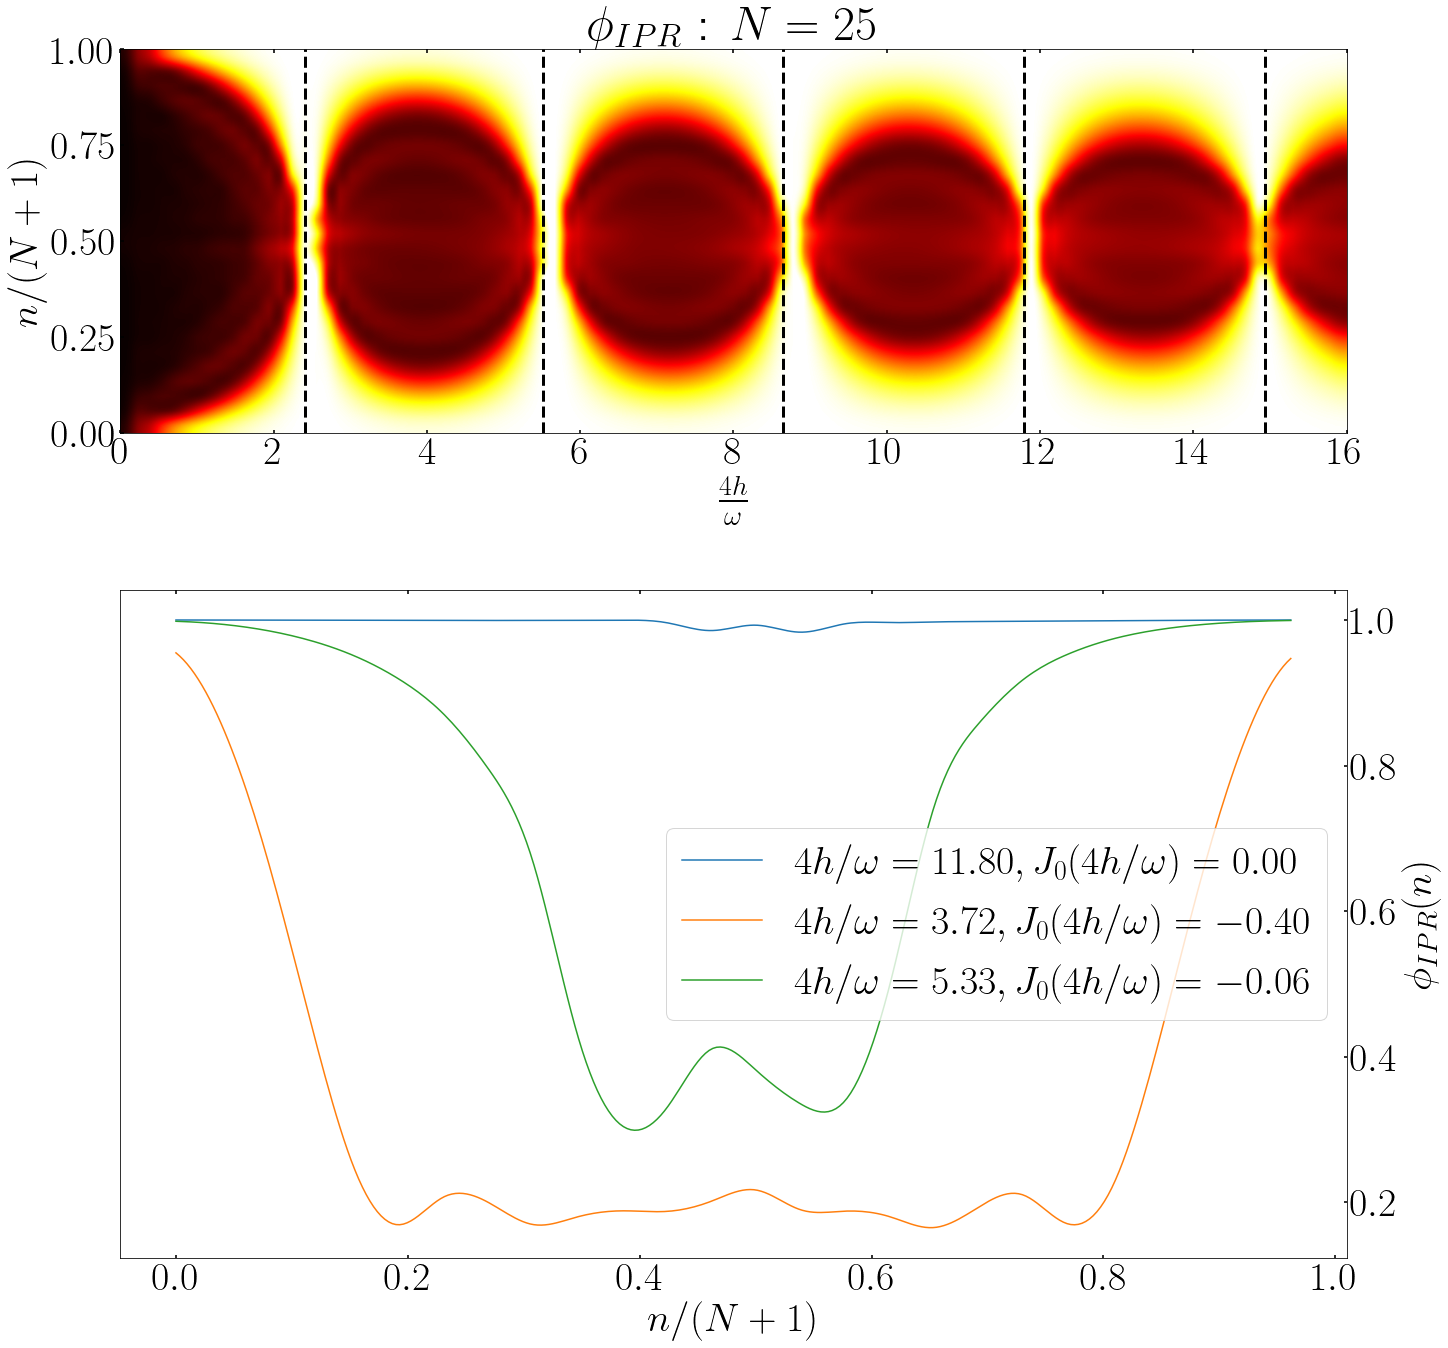

In [20]:
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})

from scipy.special import jn_zeros
freezing_pts = jn_zeros(0,5)

etas = 4 * hs/w

fig = plt.figure(constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {N}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
ipr_ax.set_ylabel(r'$n/(N+1)$')

for pt in freezing_pts:
    ipr_ax.axvline(x=pt, color='black', linestyle="--",linewidth=3.0)

ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[3], atol=0.009))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]+20

#Intermediate IPR
idx, = np.where(np.isclose(etas, 5.3, atol=0.09))
n2 = idx[0]

for i, n in enumerate([n0,n1, n2]):
    xdata = np.arange(N+1)/(N+1)
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")

    
crosssec_ax.set_xlabel(r"$n/(N+1)$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(n)$")
plt.legend()
plt.show()

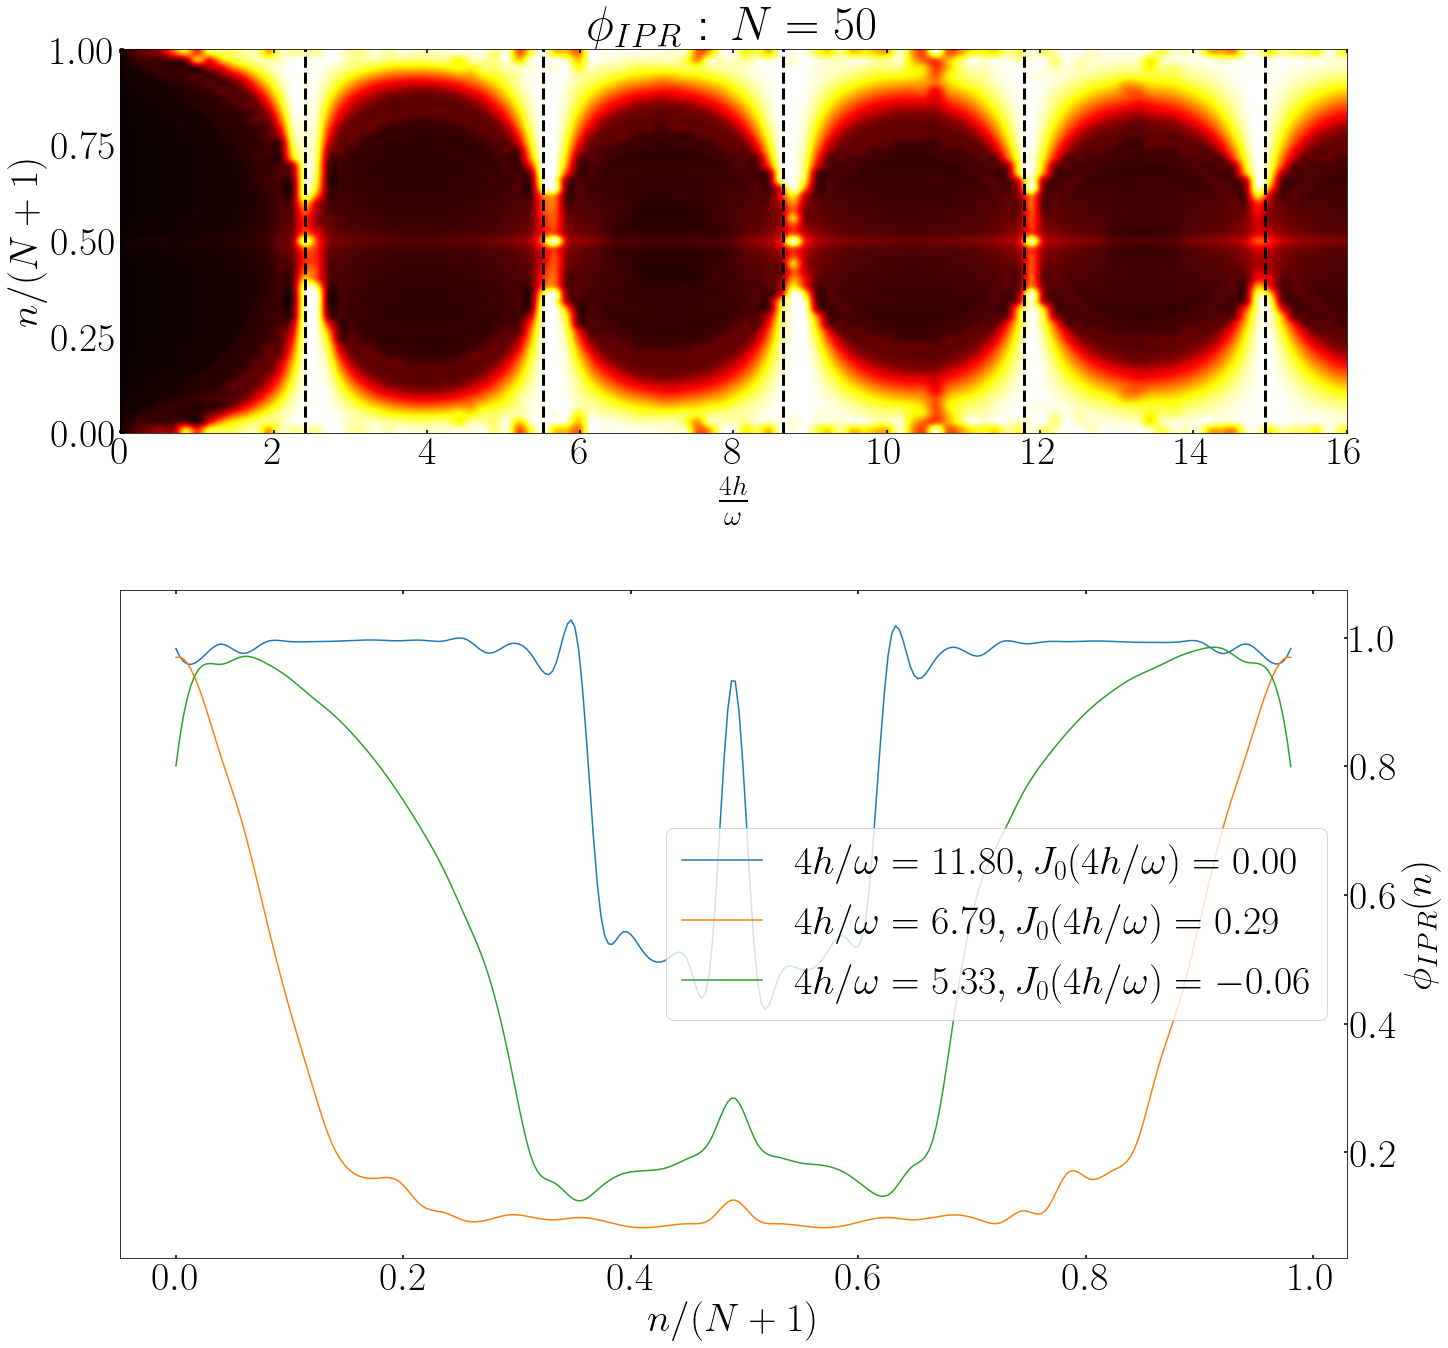

In [22]:
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})


from scipy.special import jn_zeros
freezing_pts = jn_zeros(0,5)

etas = 4 * hs/w

fig = plt.figure(constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {N}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
ipr_ax.set_ylabel(r'$n/(N+1)$')

for pt in freezing_pts:
    ipr_ax.axvline(x=pt, color='black', linestyle="--",linewidth=3.0)

ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[3], atol=0.009))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]+20

#Intermediate IPR
idx, = np.where(np.isclose(etas, 5.3, atol=0.09))
n2 = idx[0]

for i, n in enumerate([n0,n1, n2]):
    xdata = np.arange(N+1)/(N+1)
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")

    
crosssec_ax.set_xlabel(r"$n/(N+1)$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(n)$")
plt.legend()
plt.show()

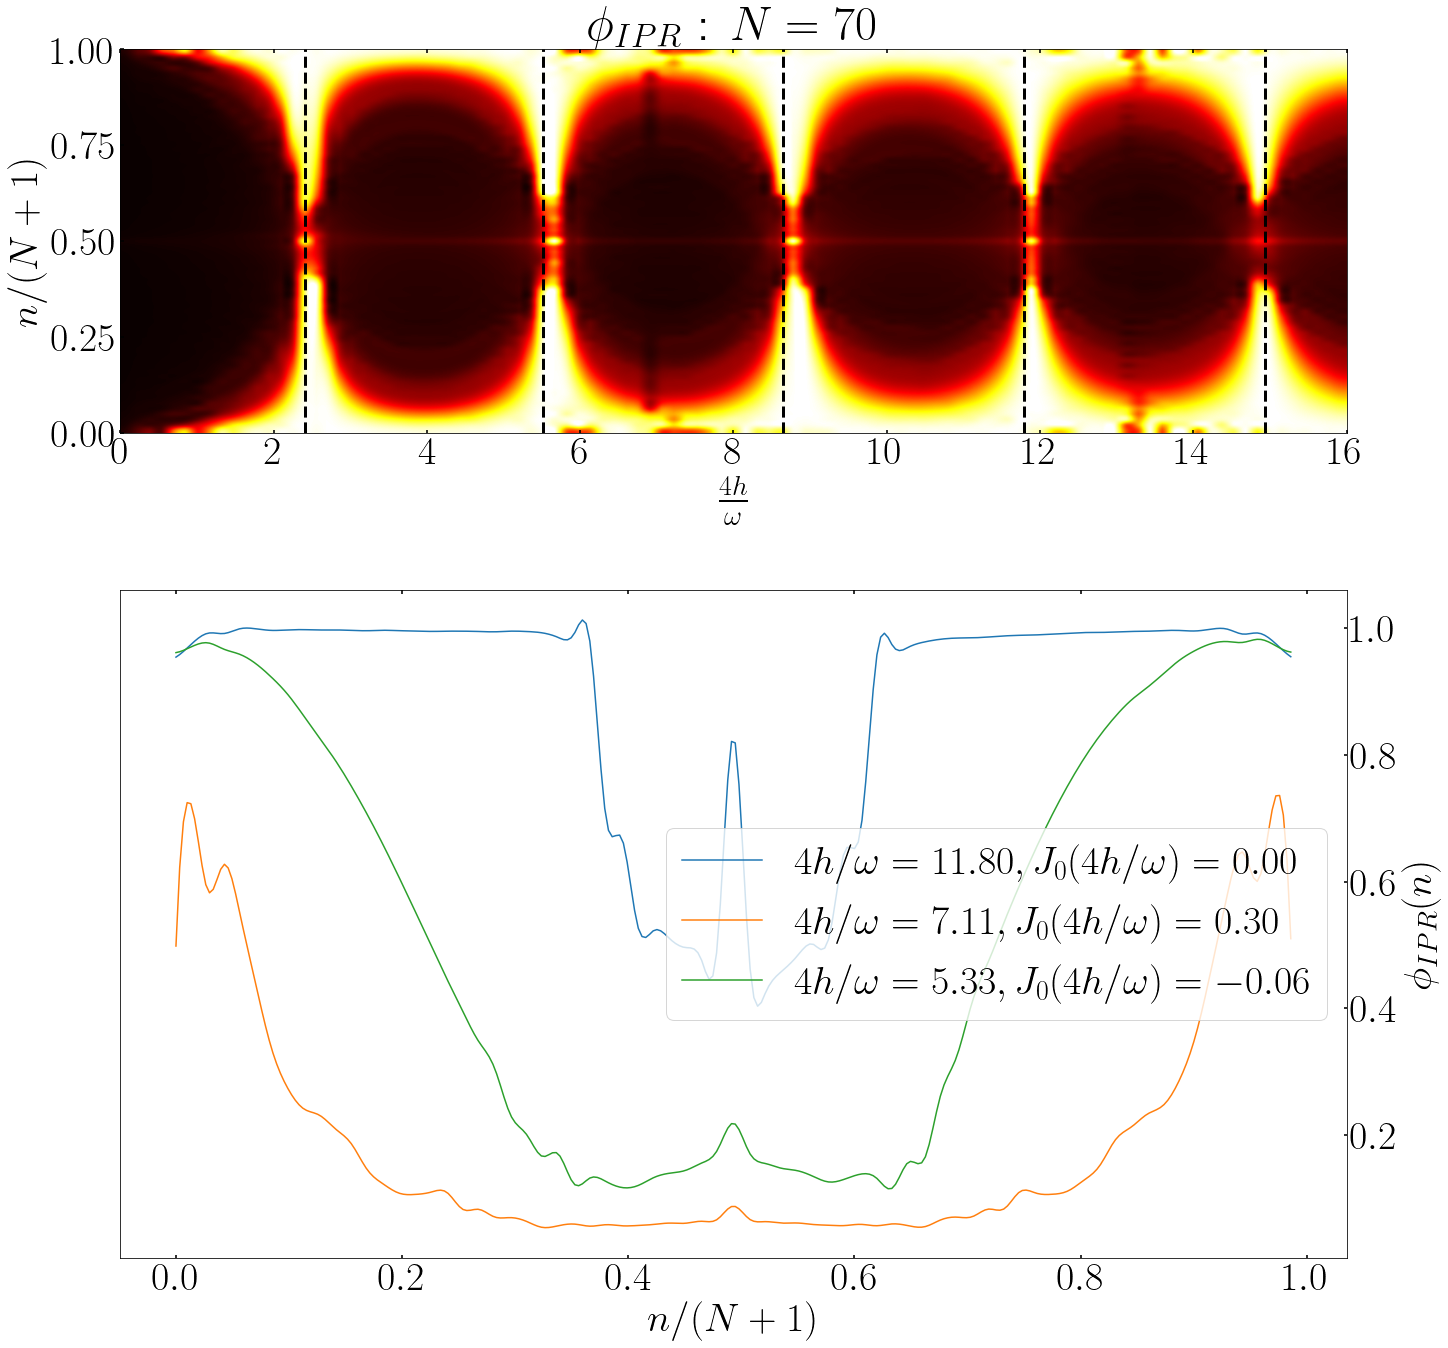

In [24]:
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})


from scipy.special import jn_zeros
freezing_pts = jn_zeros(0,5)

etas = 4 * hs/w

fig = plt.figure(constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {N}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
ipr_ax.set_ylabel(r'$n/(N+1)$')

for pt in freezing_pts:
    ipr_ax.axvline(x=pt, color='black', linestyle="--",linewidth=3.0)

ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[3], atol=0.009))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]+20

#Intermediate IPR
idx, = np.where(np.isclose(etas, 5.3, atol=0.09))
n2 = idx[0]

for i, n in enumerate([n0,n1, n2]):
    xdata = np.arange(N+1)/(N+1)
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")

    
crosssec_ax.set_xlabel(r"$n/(N+1)$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(n)$")
plt.legend()
plt.show()

In the plots above, the top panel is the IPR for different values of $4h/\omega$, where $\omega$ is set to $90$, as before with the Ising case. The ordinate plots $n/(N+1)$, where $n$ is the eigenstate count *i.e.*, $|n\rangle$ is the $n^{th}$ eigenstate of $S^x$ in the TSS subspace. There are a total of $N+1$ spins, where we have looked at $N=25, 50, 70$. After evolving for a time $t=T$, the IPR of the Floquet mode is plotted as a function of $n, 4h/\omega$. The bottom panel plots the IPR as a function of $n/(N+1)$ for a few chosen values of $h$. We can see that, for small sizes at least, the IPR at $J_0(\eta)=0$ is not always unity, but shows a dip in the middle that is not compatible with the RWA approximation. In addition, the edge-$n$ cases seem to not always have a fixed IPR, unlike the Ising case where it's always unity. Could this be some sort of 'scarring'?

### The role of disorder

If we add a spin-preserving field disorder to the Lipkin model, we have the Hamiltonian
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \hat{H}_1(t),
\end{equation}

where

\begin{eqnarray}
\hat{H}_0 &=& \sum_{ij}J_{ij}\hat{\sigma}^z_i\hat{\sigma}^z_j,\\
\hat{H}_1(t) &=& \sum_i\left(h_i\cos{\omega t} + d_i\right)\hat{\sigma}^x_i.
\end{eqnarray}
Here, the $h_i, d_i \in [-1,1]$ are random numbers. Right off the bat, we can see that this disorder is spin-preserving. This is so because $\left[S^2, \hat{H}_0\right]\sim \left[S^2, S^z\right]$ remains zero, and
\begin{align*}
\left[H_1(t), S^2\right] &=  \sum_i \left(h_i\cos{\omega t} + d_i\right) \left[S^2,\sigma^x_i\right]\\
&= \sum_i \left(h_i\cos{\omega t} + d_i\right) \left[(S^y)^2,\sigma^x_i\right] + \sum_i \left(h_i\cos{\omega t} + d_i\right) \left[(S^z)^2,\sigma^x_i\right]\\ 
&= \sum_i \left(h_i\cos{\omega t} + d_i\right)\bigg\{ S^y\left[\sigma^y_i,\sigma^x_i\right] + \left[\sigma^y_i,\sigma^x_i\right] S^y + 
S^z\left[\sigma^z_i,\sigma^x_i\right] + \left[\sigma^z_i,\sigma^x_i\right] S^z\bigg\}\\
& = \sum_i i\;\left(h_i\cos{\omega t} + d_i\right)\bigg[-\left\{S^y,\sigma^z_i\right\}+ \left\{S^z,\sigma^y_i\right\}\bigg]\\
& = 2i\sum_i \left(h_i\cos{\omega t} + d_i\right) \left(\sigma^y_i S^z - \sigma^z_i S^y\right)
\end{align*}

If $h_i, d_i$ were constant, then this sum will vanish for all system sizes. If $h_i, d_i$ are arbitrary, this will, in general, not vanish. **However,** we can choose the $h_i, d_i$ to be constant across a block of two (or any number $n\ll N$) consecutive lattice sites. That way, the sum can be made to vanish in each block. For example, choose $h_i, d_i = h_{i+1}, d_{i+1} = h_x, d_x$ for the $x^{th}$ spin-block of $i, i+1$, which will cause their contributions in the sum above to cancel. If we restrict the number of spins to an integer multiple of the block size, then the sum above will vanish, retaining the conservation of total angular momentum. As long as $n\ll N$, the field remains pretty disordered if coarse-grained over a block. Nonetheless, the system can be populated in the subspace spanned by the $S = \sqrt{\left(N/2+1\right)N/2}$ eigenstates and made to remain there at all times.

Next, we need the matrix elements. If $|s_n\rangle$ is an eigenstate of $S^z$ in this subspace, then

\begin{align*}
\langle s_m|H_1(t)|s_n\rangle &= \sum_i\left(h_i\cos{\omega t} + d_i\right)\langle s_m|\hat{\sigma}^x_i|s_n\rangle\\
&=\sum_i\left(h_i\cos{\omega t} + d_i\right)\left\langle\left(\sum_p c_p \right)^m\left(c^\dagger_i + c_i \right)\left(\sum_q c^\dagger_q \right)^n\right\rangle
\end{align*}
Here, the expectation value is with respect to the 'vacuum' state where all spins are pointing down *viz.* $|0\rangle = |\downarrow\downarrow\downarrow\dots\downarrow\rangle$, and the fermionic annihilation (creation) operators are given by $c_i\;(c^\dagger_i) = s^\mp_i = \sigma^x_i \mp i \sigma^y_i$.I can either try to simplify this analytically or symbolically.